# Hessians, Curvature, and Convexity

## Overview
In this notebook, we explore:
- The **Hessian matrix** and its role in optimization
- How curvature affects convergence and stability
- **Convex vs non-convex functions**
- Practical examples using Python and NumPy




In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## 1. Hessian Matrix

The **Hessian** of a function is a square matrix of second-order partial derivatives. For a function:

\[
f(x, y)
\]

The Hessian is:

\[
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
\]

- The Hessian describes **local curvature** of the function.
- Positive definite Hessian → local minimum  
- Negative definite Hessian → local maximum  
- Mixed eigenvalues → saddle point


In [2]:
# Define a 2D function
def f2(X):
    x, y = X
    return x**2 + y**2  # simple convex function

# Hessian manually
def hessian_f2(X):
    return np.array([[2, 0],
                     [0, 2]])  # constant Hessian for this function

# Evaluate Hessian at point (1,1)
point = np.array([1, 1])
H = hessian_f2(point)
print("Hessian at point (1,1):\n", H)


Hessian at point (1,1):
 [[2 0]
 [0 2]]


### Observation
- The Hessian is **positive definite** (all eigenvalues > 0), so the function is convex.  
- Curvature is constant because this is a quadratic function.


## 2. Visualizing Function and Curvature


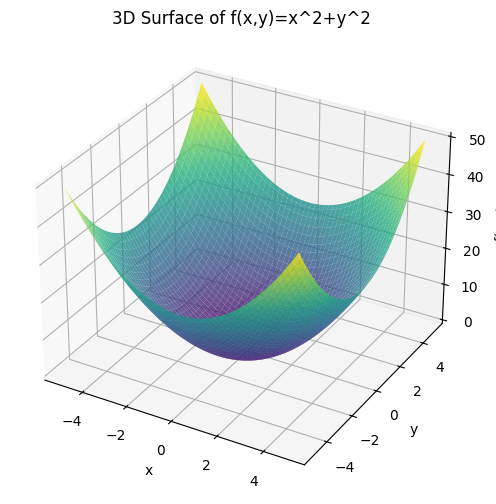

In [3]:
# 3D plot of the function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("3D Surface of f(x,y)=x^2+y^2")
plt.show()


## 3. Convex vs Non-Convex Functions

- **Convex Function:** A line segment between any two points on the function lies above the function. Example: \(f(x) = x^2 + y^2\)  
- **Non-Convex Function:** Has multiple minima/maxima. Example: \(f(x) = x^4 - x^2\)


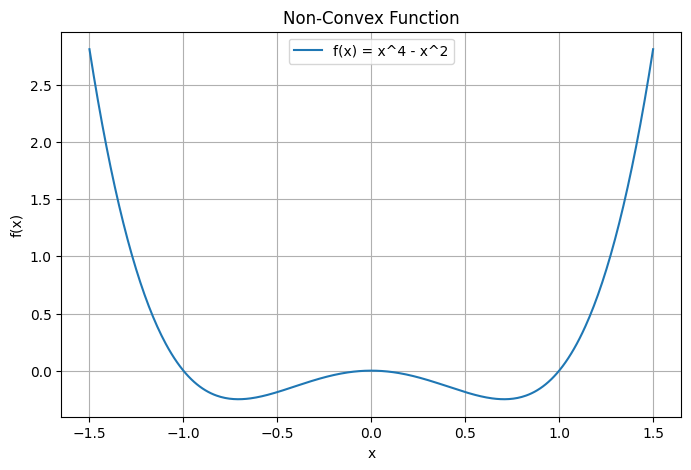

In [4]:
# Non-convex function
def f_nonconvex(x):
    return x**4 - x**2

x_vals = np.linspace(-1.5, 1.5, 400)
y_vals = f_nonconvex(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label="f(x) = x^4 - x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Non-Convex Function")
plt.grid(True)
plt.legend()
plt.show()


### Observation
- Non-convex function has **multiple minima and a maximum**.  
- Gradient descent may **converge to different local minima** depending on the starting point.


## 4. Hessian and Optimization Behavior

We can see how curvature affects **gradient descent convergence**.

- Steep curvature → small steps needed  
- Flat regions → slow convergence  
- Saddle points → gradient near zero but not a minimum


In [5]:
# Example: plot curvature with Hessian eigenvalues
H = np.array([[4, 0], [0, 0.1]])  # elongated quadratic
eigenvalues = np.linalg.eigvals(H)
print("Eigenvalues of Hessian:", eigenvalues)
print("Observation: Different curvatures in x and y directions affect convergence speed.")


Eigenvalues of Hessian: [4.  0.1]
Observation: Different curvatures in x and y directions affect convergence speed.


## 5. Gradient Descent on Non-Convex Function

Let's try gradient descent on \(f(x) = x^4 - x^2\) to show **multiple minima**.


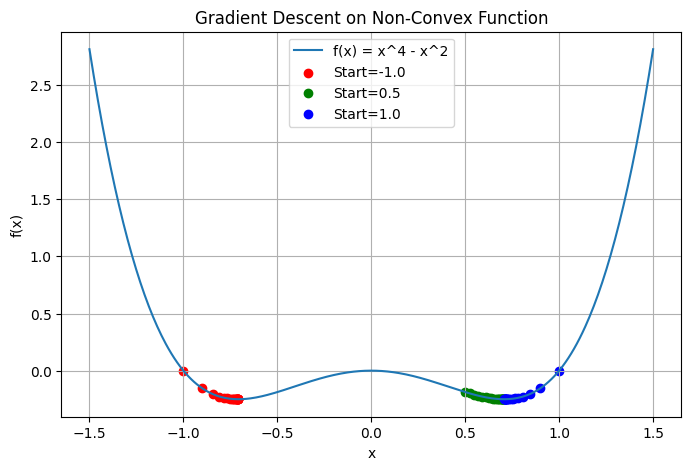

In [6]:
def grad_f_nonconvex(x):
    return 4*x**3 - 2*x

def gradient_descent_1d(start, grad, lr=0.05, iterations=20):
    x = start
    trajectory = [x]
    for i in range(iterations):
        x = x - lr * grad(x)
        trajectory.append(x)
    return trajectory

# Run gradient descent from different starting points
starts = [-1.0, 0.5, 1.0]
trajectories = [gradient_descent_1d(s, grad_f_nonconvex) for s in starts]

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label="f(x) = x^4 - x^2")
colors = ['red', 'green', 'blue']
for traj, c, s in zip(trajectories, colors, starts):
    plt.scatter(traj, [f_nonconvex(x) for x in traj], color=c, label=f"Start={s}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on Non-Convex Function")
plt.grid(True)
plt.legend()
plt.show()


## Summary

- Hessians describe **curvature** of functions and affect optimization behavior.  
- Convex functions have **single global minimum**, non-convex may have multiple minima/maxima.  
- Gradient descent can converge differently based on **curvature and starting point**.  
- Understanding curvature and Hessians is essential for **optimization stability and ML algorithm design**.  
- These concepts guide practical choices in **learning rate, initialization, and optimizer selection**.
